# Train LSTM models

## Read data

In [1]:
import os
import re
import pandas as pd
import numpy as np
import random
import sklearn
import codecs
import collections
from tqdm import tqdm

np.random.seed(0)

In [2]:
TRAIN_DIR = "./data/training/"
TRAIN_SUFFIX = "-train.txt"

DEV_DIR = "./data/development/"
DEV_SUFFIX = "-dev.txt"

TEST_DIR = "./data/test-gold/"
TEST_SUFFIX = "-test-gold.txt"

YEAR_PREFIX = "2018-"
FILE_PREFIX = "EI-oc-En-"

EMOTIONS = ["anger", "fear", "joy", "sadness"] 
LABEL_EMOTIONS = {i: emo for i, emo in enumerate(EMOTIONS)}
EMOTIONS_LABEL = {emo: i for i, emo in enumerate(EMOTIONS)}

In [3]:
TRAIN_FILES = []
DEV_FILES = []
TEST_FILES = []

for emo in EMOTIONS: 
    TRAIN_FILES += [TRAIN_DIR + FILE_PREFIX + emo + TRAIN_SUFFIX]
    DEV_FILES += [DEV_DIR + YEAR_PREFIX + FILE_PREFIX + emo + DEV_SUFFIX]
    TEST_FILES += [TEST_DIR + YEAR_PREFIX + FILE_PREFIX + emo + TEST_SUFFIX]

for file in TRAIN_FILES + DEV_FILES + TEST_FILES:
    print(file, os.path.exists(file))

./data/training/EI-oc-En-anger-train.txt True
./data/training/EI-oc-En-fear-train.txt True
./data/training/EI-oc-En-joy-train.txt True
./data/training/EI-oc-En-sadness-train.txt True
./data/development/2018-EI-oc-En-anger-dev.txt True
./data/development/2018-EI-oc-En-fear-dev.txt True
./data/development/2018-EI-oc-En-joy-dev.txt True
./data/development/2018-EI-oc-En-sadness-dev.txt True
./data/test-gold/2018-EI-oc-En-anger-test-gold.txt True
./data/test-gold/2018-EI-oc-En-fear-test-gold.txt True
./data/test-gold/2018-EI-oc-En-joy-test-gold.txt True
./data/test-gold/2018-EI-oc-En-sadness-test-gold.txt True


In [4]:
TRAIN_DATA = pd.concat(pd.read_csv(f, sep='\t') for f in TRAIN_FILES)
TRAIN_DATA = sklearn.utils.shuffle(TRAIN_DATA)
TRAIN_DATA        

,ID,Tweet,Affect Dimension,Intensity Class
1384,2017-En-30404,@carysmithwriter @Maria_Savva @RealRockAndRoll...,joy,1: low amount of joy can be inferred
760,2017-En-31434,@Somong_MGMT We need 2 bust up the elites in D...,joy,0: no joy can be inferred
2149,2017-En-21549,@BowkerMorgan awe thanks morgs!!! love u lots ...,fear,0: no fear can be inferred
509,2017-En-10175,Forgot to eat dinner and now I'm furious with ...,anger,3: high amount of anger can be inferred
609,2017-En-22203,Angel got me nervous out here 😷,fear,2: moderate amount of fear can be inferred
...,...,...,...,...
978,2017-En-30802,Wanted to get him a cake with sparkling candle...,joy,0: no joy can be inferred
1563,2017-En-21144,@FraserKeegan just had a steak pie supper,fear,0: no fear can be inferred
1653,2017-En-11529,Now that the n word is normalized by the media...,anger,2: moderate amount of anger can be inferred
906,2017-En-21955,Huge congrats to my friends at @VoidMovie on t...,fear,0: no fear can be inferred


In [5]:
TRAIN_DATA["Category"] = TRAIN_DATA["Affect Dimension"]
TRAIN_DATA["Label"] = TRAIN_DATA["Affect Dimension"].apply(lambda x: EMOTIONS_LABEL[x])
TRAIN_DATA["Intensity"] = TRAIN_DATA["Intensity Class"].apply(lambda x: int(x[0]))
TRAIN_DATA

,ID,Tweet,Affect Dimension,Intensity Class,Category,Label,Intensity
1384,2017-En-30404,@carysmithwriter @Maria_Savva @RealRockAndRoll...,joy,1: low amount of joy can be inferred,joy,2,1
760,2017-En-31434,@Somong_MGMT We need 2 bust up the elites in D...,joy,0: no joy can be inferred,joy,2,0
2149,2017-En-21549,@BowkerMorgan awe thanks morgs!!! love u lots ...,fear,0: no fear can be inferred,fear,1,0
509,2017-En-10175,Forgot to eat dinner and now I'm furious with ...,anger,3: high amount of anger can be inferred,anger,0,3
609,2017-En-22203,Angel got me nervous out here 😷,fear,2: moderate amount of fear can be inferred,fear,1,2
...,...,...,...,...,...,...,...
978,2017-En-30802,Wanted to get him a cake with sparkling candle...,joy,0: no joy can be inferred,joy,2,0
1563,2017-En-21144,@FraserKeegan just had a steak pie supper,fear,0: no fear can be inferred,fear,1,0
1653,2017-En-11529,Now that the n word is normalized by the media...,anger,2: moderate amount of anger can be inferred,anger,0,2
906,2017-En-21955,Huge congrats to my friends at @VoidMovie on t...,fear,0: no fear can be inferred,fear,1,0


In [6]:
TRAIN_DATA["Category"].value_counts()

fear       2252
anger      1701
joy        1616
sadness    1533
Name: Category, dtype: int64

In [7]:
DEV_DATA = pd.concat(pd.read_csv(f, sep='\t') for f in DEV_FILES)
DEV_DATA = sklearn.utils.shuffle(DEV_DATA)
DEV_DATA

,ID,Tweet,Affect Dimension,Intensity Class
249,2018-En-03024,@AChubbyPanda *He would growl softly and licks...,anger,0: no anger can be inferred
334,2018-En-03352,Selling nudes pics and vids kik me to buy! Dir...,anger,0: no anger can be inferred
277,2018-En-01524,@NRO @Acosta @CNN @realDonaldTrump remember wh...,anger,1: low amount of anger can be inferred
133,2018-En-00794,@620wtmj Seriously @620wtmj !? This is news to...,sadness,2: moderate amount of sadness can be inferred
110,2018-En-01525,@BeautinaSuit No need to thank me.. I'm just t...,joy,2: moderate amount of joy can be inferred
...,...,...,...,...
108,2018-En-00688,@AwardsDaily Looks that way. I don't want to ...,anger,1: low amount of anger can be inferred
368,2018-En-02646,"Beware the wrath of an angry, frustrated, #agi...",fear,2: moderate amount of fear can be inferred
253,2018-En-04274,@Cmdr_Hadfield CNN's Wolf Blitzer calls you an...,sadness,2: moderate amount of sadness can be inferred
347,2018-En-01143,My best friends driving for the first time wit...,anger,0: no anger can be inferred


In [8]:
DEV_DATA["Category"] = DEV_DATA["Affect Dimension"]
DEV_DATA["Label"] = DEV_DATA["Affect Dimension"].apply(lambda x: EMOTIONS_LABEL[x])
DEV_DATA["Intensity"] = DEV_DATA["Intensity Class"].apply(lambda x: int(x[0]))
DEV_DATA

,ID,Tweet,Affect Dimension,Intensity Class,Category,Label,Intensity
249,2018-En-03024,@AChubbyPanda *He would growl softly and licks...,anger,0: no anger can be inferred,anger,0,0
334,2018-En-03352,Selling nudes pics and vids kik me to buy! Dir...,anger,0: no anger can be inferred,anger,0,0
277,2018-En-01524,@NRO @Acosta @CNN @realDonaldTrump remember wh...,anger,1: low amount of anger can be inferred,anger,0,1
133,2018-En-00794,@620wtmj Seriously @620wtmj !? This is news to...,sadness,2: moderate amount of sadness can be inferred,sadness,3,2
110,2018-En-01525,@BeautinaSuit No need to thank me.. I'm just t...,joy,2: moderate amount of joy can be inferred,joy,2,2
...,...,...,...,...,...,...,...
108,2018-En-00688,@AwardsDaily Looks that way. I don't want to ...,anger,1: low amount of anger can be inferred,anger,0,1
368,2018-En-02646,"Beware the wrath of an angry, frustrated, #agi...",fear,2: moderate amount of fear can be inferred,fear,1,2
253,2018-En-04274,@Cmdr_Hadfield CNN's Wolf Blitzer calls you an...,sadness,2: moderate amount of sadness can be inferred,sadness,3,2
347,2018-En-01143,My best friends driving for the first time wit...,anger,0: no anger can be inferred,anger,0,0


In [9]:
DEV_DATA["Affect Dimension"].value_counts()

sadness    397
fear       389
anger      388
joy        290
Name: Affect Dimension, dtype: int64

## Tweet cleaning

In [10]:
#For Pre-Processing
import emoji
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.tokenize import RegexpTokenizer 
from nltk.tokenize import word_tokenize

stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# For visualizing
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def decode_emoji(text):
    output = []
    for t in emoji.demojize(text).split():
        output.extend(t.split("_"))
    return ' '.join(output)

def decode_HTML(text):
    return BeautifulSoup(text, 'lxml').get_text()

def remove_mention(text):
    return re.sub(r'@[A-Za-z0-9]+', '', text)
    
def remove_URL(text):
    return re.sub(r"http\S+", "", text)

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', ' ', text)

def to_lowercase(text):
    return ' '.join([w.lower() for w in text.split()])
 
def lemmatize_stemming(text):
    return ' '.join([stemmer.stem(lemmatizer.lemmatize(w, pos='v'))
                     for w in text.split()])

def remove_stop_words(text):
    return ' '.join([w for w in text.split() if w not in stop_words ])

In [34]:
def pre_process(text):
    text = decode_emoji(text)
    text = decode_HTML(text)
    text = remove_mention(text)
    text = remove_URL(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
#     text = lemmatize_stemming(text)
    text = remove_stop_words(text)
    return text

In [35]:
for t in TRAIN_DATA["Tweet"][:10]:
    print("BEFORE:", t)
    print("AFTER :", pre_process(t))
    print()

BEFORE: @carysmithwriter @Maria_Savva @RealRockAndRoll We're the least known band in the World, but so glad you asked #muchlove 
AFTER : savva least known band world glad asked muchlove

BEFORE: @Somong_MGMT We need 2 bust up the elites in DC, we need jobs 4 all, we need to clean up the blithe in inner Cities, rebuild housing...cont2
AFTER : mgmt need 2 bust elites dc need jobs 4 need clean blithe inner cities rebuild housing cont2

BEFORE: @BowkerMorgan awe thanks morgs!!! love u lots girly ❤️😊❤️
AFTER : awe thanks morgs love u lots girly red heart selector smiling face smiling eyes red heart selector

BEFORE: Forgot to eat dinner and now I'm furious with everything and everyone
AFTER : forgot eat dinner furious everything everyone

BEFORE: Angel got me nervous out here 😷
AFTER : angel got nervous face medical mask

BEFORE: 3 Styles to Love now at Zales!  Three sparkling styles to love! Stop by and shop in store today.
AFTER : 3 styles love zales three sparkling styles love stop shop 

In [36]:
# Train data cleaning
TRAIN_DATA["Text"] = TRAIN_DATA["Tweet"].apply(lambda s: pre_process(s))
TRAIN_DATA["Text_len"] = TRAIN_DATA["Text"].apply(lambda s: len(s.split()))
TRAIN_DATA.head(5)

,ID,Tweet,Affect Dimension,Intensity Class,Category,Label,Intensity,Text,Text_len
1384,2017-En-30404,@carysmithwriter @Maria_Savva @RealRockAndRoll...,joy,1: low amount of joy can be inferred,joy,2,1,savva least known band world glad asked muchlove,8
760,2017-En-31434,@Somong_MGMT We need 2 bust up the elites in D...,joy,0: no joy can be inferred,joy,2,0,mgmt need 2 bust elites dc need jobs 4 need cl...,17
2149,2017-En-21549,@BowkerMorgan awe thanks morgs!!! love u lots ...,fear,0: no fear can be inferred,fear,1,0,awe thanks morgs love u lots girly red heart s...,17
509,2017-En-10175,Forgot to eat dinner and now I'm furious with ...,anger,3: high amount of anger can be inferred,anger,0,3,forgot eat dinner furious everything everyone,6
609,2017-En-22203,Angel got me nervous out here 😷,fear,2: moderate amount of fear can be inferred,fear,1,2,angel got nervous face medical mask,6


In [37]:
# Dev data cleaning
DEV_DATA["Text"] = DEV_DATA["Tweet"].apply(lambda s: pre_process(s))
DEV_DATA["Text_len"] = DEV_DATA["Text"].apply(lambda s: len(s.split()))
DEV_DATA.head(5)

,ID,Tweet,Affect Dimension,Intensity Class,Category,Label,Intensity,Text,Text_len
249,2018-En-03024,@AChubbyPanda *He would growl softly and licks...,anger,0: no anger can be inferred,anger,0,0,would growl softly licks lips need prove think...,13
334,2018-En-03352,Selling nudes pics and vids kik me to buy! Dir...,anger,0: no anger can be inferred,anger,0,0,selling nudes pics vids kik buy dirty becca69 ...,20
277,2018-En-01524,@NRO @Acosta @CNN @realDonaldTrump remember wh...,anger,1: low amount of anger can be inferred,anger,0,1,remember nro gave cnn grief relentless hc emai...,10
133,2018-En-00794,@620wtmj Seriously @620wtmj !? This is news to...,sadness,2: moderate amount of sadness can be inferred,sadness,3,2,seriously news sad n nwhy focus important issues,8
110,2018-En-01525,@BeautinaSuit No need to thank me.. I'm just t...,joy,2: moderate amount of joy can be inferred,joy,2,2,need thank telling like smiling face smiling e...,15


count    7102.000000
mean        9.406787
std         4.368464
min         1.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        79.000000
Name: Text_len, dtype: float64


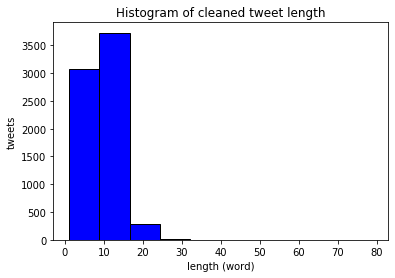

In [38]:
print(TRAIN_DATA["Text_len"].describe())

plt.hist(TRAIN_DATA["Text_len"], color='blue', edgecolor='black')
plt.title('Histogram of cleaned tweet length')
plt.xlabel('length (word)')
plt.ylabel('tweets')
plt.show()

In [39]:
for i, t in TRAIN_DATA.iterrows():
    if t["Text_len"] > 30:
        print("BEFORE:", t["Tweet"])
        print("AFTER :", t["Text"])
        print()

BEFORE: @priny_baby happppy happppyyyyyy happppppyyyyy haaapppyyyy birthday best friend!! Love you lots 💖💖💖💖💖💖💖🎉🎊 #chapter22 #bdaygirl  #love
AFTER : baby happppy happppyyyyyy happppppyyyyy haaapppyyyy birthday best friend love lots sparkling heart sparkling heart sparkling heart sparkling heart sparkling heart sparkling heart sparkling heart party popper confetti ball chapter22 bdaygirl love

BEFORE: Fast and furious 6 this Monday 10 pm on mbc 2 😍😍😍😍😍😍😍
AFTER : fast furious 6 monday 10 pm mbc 2 smiling face heart eyes smiling face heart eyes smiling face heart eyes smiling face heart eyes smiling face heart eyes smiling face heart eyes smiling face heart eyes

BEFORE: i will never watch greys anatomy ever ever ever ever ever again if Shonda Rimes takes away another OG character☹️☹️☹️☹️☹️☹️☹️☹️☹️☹️ #fuming
AFTER : never watch greys anatomy ever ever ever ever ever shonda rimes takes away another og character frowning face selector frowning face selector frowning face selector frowning 

## tokenzing data

In [40]:
MAX_NB_WORDS = 100000

In [41]:
counter = collections.Counter(word for text in TRAIN_DATA['Text'] for word in text.split())
words_list = sorted(counter.items(), key=lambda x:x[1], reverse=True)
word_index = {word[0]: i+1 for i, word in enumerate(words_list)}
print("dictionary size: ", len(word_index))

dictionary size:  12909


In [47]:
def pad_text(words):
    if len(words) >= max_seq_len:
        return words[: max_seq_len]
    else:
        pad_len = max_seq_len - len(words)
        padding = np.zeros(pad_len)
        return np.concatenate((padding, words), axis=0)

def words_to_seq(words):
    return np.array([word_index.get(word, 0) for word in words])

def prep(data):
    X_data = []
    y_data = []
    
    for X, y in zip(data["Tweet"], data["Label"]):
        words = pre_process(X).split()
        if len(words) > 0:
            X_data.append(pre_process(X))
            y_data.append(y)
            
    return X_data, y_data

In [48]:
X_train, y_train = prep(TRAIN_DATA)
X_dev, y_dev = prep(DEV_DATA)

In [45]:
# function to predict accuracy
def acc(pred, label):
    pred = torch.argmax(pred, 1)
    return torch.sum(pred == label).item()

In [46]:
# function to plot the accuracy and loss
def plot_acc_loss(tr_acc, vl_acc, tr_loss, vl_loss):
    fig = plt.figure(figsize = (20, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_tr_acc, label='Train Acc')
    plt.plot(epoch_vl_acc, label='Validation Acc')
    plt.title("Accuracy")
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(epoch_tr_loss, label='Train loss')
    plt.plot(epoch_vl_loss, label='Validation loss')
    plt.title("Loss")
    plt.legend()
    plt.grid()

    plt.show()

## BERT model

In [49]:
import transformers
from transformers import AutoModel, BertTokenizerFast

# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

In [ ]:
# tokenized_text = tokenizer.tokenize(some_text)
# tokenizer.convert_tokens_to_ids(tokenized_text)

In [50]:
def tokenizing(text):
    tokens_text = tokenizer.batch_encode_plus(
        text.tolist(),
        max_length = 25,
        pad_to_max_length=True,
        truncation=True
    )
    seq = torch.tensor(tokens_text['input_ids'])
    mask = torch.tensor(tokens_text['attention_mask'])
    return seq, mask

In [51]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [53]:
import torch
import torch.nn as nn

class BERT_Arch(nn.Module):

    def __init__(self, bert):      
        super(BERT_Arch, self).__init__()
        self.bert = bert

        self.relu =  nn.ReLU()       
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(768, 512)
        self.fc2 = nn.Linear(512, 2)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, sent_id, mask):
        _, cls_hs = self.bert(sent_id, attention_mask=mask)
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)
        print(x)

        return x

In [55]:
from transformers import AdamW

model = BERT_Arch(bert)
lr = 1e-5
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=lr)

In [56]:
# function to train the model
def train():
  
    model.train()
    total_loss, total_accuracy = 0, 0
    total_preds=[]
  
    # iterate over batches
#     for step, batch in enumerate(train_dataloader):   
#         sent_id, mask, labels = batch
        
    for start in range(0, len(X_train), batch_size):

        inputs, masks= [], []
        for t in X_train[start: start+batch_size]:
            s, m = tokenizing(t)
            inputs.append(s)
            masks.append(m)
            labels.append()
        labels = torch.Tensor(y_train[start: start+batch_size]).long()

        print(inputs)
        print(masks)
        print(labels)
        
        # clear previously calculated gradients 
        model.zero_grad()        

        # get model predictions for the current batch
        preds = model(inputs, masks)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()


        # append the model predictions
        total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
  
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    # returns the loss and predictions
    return avg_loss, total_preds

In [57]:
# function for evaluating the model
def evaluate():
    print("\nEvaluating...")
    
    model.eval()
    total_loss, total_accuracy = 0, 0
    total_preds = []

    for step, batch in enumerate(train_dataloader):
        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():

            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)
            total_loss = total_loss + loss.item()
            preds = preds.detach().cpu().numpy()
            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader) 

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [58]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')

NameError: name 'epochs' is not defined

## bi-LSTM model

In [76]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence

class LSTM(nn.Module):

    def __init__(self, hidden_dim=64, no_layers=2, dropout=0.2):
        super(LSTM, self).__init__()
        self.no_layers = no_layers
        self.hidden_dim = hidden_dim

        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix))
#         self.embedding.weight.requires_grad = False
        
        self.dimension = hidden_dim
        self.lstm = nn.LSTM(input_size=embed_dim,
                            hidden_size=self.dimension,
                            num_layers=self.no_layers,
                            batch_first=True,
                            bidirectional=True)
        self.drop = nn.Dropout(p=dropout)

        self.fc = nn.Linear(2*self.hidden_dim, 4)

    def forward(self, text):

        text_len = np.array([len(t) for t in text]) 
        
        padded_input = pad_sequence(text, batch_first=True)
        embbed_input = self.embedding(padded_input)
        packed_input = pack_padded_sequence(embbed_input, text_len, batch_first=True, enforce_sorted=False)
        packed_output, _ = self.lstm(packed_input)
        output, output_len = pad_packed_sequence(packed_output, batch_first=True)

        
        out_forward = torch.cat([torch.mean(t[:l, :self.dimension], 0, keepdim=True) for (t, l) in zip(output, output_len)])
        out_reverse = torch.cat([torch.mean(t[-l:, self.dimension:], 0, keepdim=True) for (t, l) in zip(output, output_len)])             
        out_reduced = torch.cat((out_forward, out_reverse), 1)
        text_fea = self.drop(out_reduced)

        text_fea = self.fc(text_fea)
        text_fea = torch.squeeze(text_fea, 1)
        text_out = torch.sigmoid(text_fea)

        return text_out      

In [117]:
no_layers = 3
vocab_size = nb_words
hidden_dim = 32
dropout = 0.1
output_dim = 4

model = LSTM(hidden_dim, no_layers, dropout)
print(25*'==')
print(model)
print(25*'==')

LSTM(
  (embedding): Embedding(12910, 300)
  (lstm): LSTM(300, 32, num_layers=3, batch_first=True, bidirectional=True)
  (drop): Dropout(p=0.1, inplace=False)
  (fc): Linear(in_features=64, out_features=4, bias=True)
)


In [ ]:
clip = 5
epochs = 30 
batch_size = 100

lr=0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

valid_loss_min = np.Inf
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    
    for start in range(0, len(X_train), batch_size):

        inputs = [torch.from_numpy(t) for t in X_train[start: start+batch_size]]
        labels = torch.Tensor(y_train[start: start+batch_size]).long()

        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
        train_acc += acc(output, labels)

        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)

    with torch.no_grad():
        val_losses = []
        val_acc = 0.0
        model.eval()

        for start in range(0, len(X_dev), batch_size): 
            v_inputs = [torch.from_numpy(t) for t in X_dev[start: start+batch_size]]
            v_labels = torch.Tensor(y_dev[start: start+batch_size]).long()
      
            output = model(v_inputs)
            val_loss = criterion(output, v_labels)

            val_losses.append(val_loss.item())
            accuracy = acc(output, v_labels)
            val_acc += accuracy
        
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(X_train)
    epoch_val_acc = val_acc/len(X_dev)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')

    if epoch_val_loss <= valid_loss_min:
#         torch.save(model.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

plot_acc_loss(epoch_tr_acc, epoch_vl_acc, epoch_tr_loss, epoch_vl_loss)

Epoch 1
train_loss : 1.368250835273001 val_loss : 1.335102335611979
train_accuracy : 32.44156575612504 val_accuracy : 36.36363636363637
Validation loss decreased (inf --> 1.335102).  Saving model ...
Epoch 2
train_loss : 1.2525435272190306 val_loss : 1.2927789131800334
train_accuracy : 46.05744860602647 val_accuracy : 36.91045796308954
Validation loss decreased (1.335102 --> 1.292779).  Saving model ...
Epoch 3
train_loss : 1.1898780663808186 val_loss : 1.2820415496826172
train_accuracy : 48.606026471416506 val_accuracy : 38.961038961038966
Validation loss decreased (1.292779 --> 1.282042).  Saving model ...
Epoch 4
train_loss : 1.1455140842331781 val_loss : 1.2743817249933878
train_accuracy : 52.661222190932136 val_accuracy : 39.50786056049214
Validation loss decreased (1.282042 --> 1.274382).  Saving model ...
Epoch 5
train_loss : 1.0990502155489392 val_loss : 1.2705219268798829
train_accuracy : 60.47592227541537 val_accuracy : 43.0622009569378
Validation loss decreased (1.274382 -->

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

## LSTM with fastText embedding

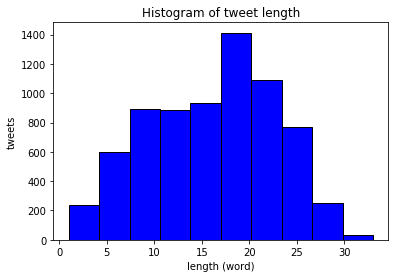

In [245]:
import matplotlib.pyplot as plt

plt.hist([len(tweet.split()) for tweet in TRAIN_DATA["Tweet"]], color = 'blue', edgecolor = 'black')
plt.title('Histogram of tweet length')
plt.xlabel('length (word)')
plt.ylabel('tweets')
plt.show()

In [322]:
MAX_LEN = 50
WORD_DIM = 100

def pad_text(words):
    if len(words) >= MAX_LEN:
        return words[: MAX_LEN]
    else:
        pad_len = MAX_LEN - len(words)
#         padding = np.zeros((pad_len, WORD_DIM))
        padding = np.zeros(pad_len)
        return np.concatenate((words, padding), axis=0)

In [286]:
def words_to_vec(words):
    return np.array([fast_model.get_word_vector(word) for word in words])

In [394]:
vocabs = set()
for tweet in TRAIN_DATA["Tweet"]:
    words = pre_process(tweet).split()
    for word in words:
        vocabs.add(word)
vocabs = list(sorted(vocabs))
voc_to_id = {v: i+1 for i, v in enumerate(vocabs)}

def words_to_id(words):
    return np.array([voc_to_id.get(word, 0) for word in words])

In [406]:
def prep(data):
    X_data = []
    y_data = []
    
    for X, y in zip(data["Tweet"], data["Label"]):
        words = pre_process(X).split()
        if len(words) > 0:
#             X_data.append(pad_text(words_to_vec(words)))
            X_data.append(pad_text(words_to_id((words))))
            y_data.append(y)
            
    return np.array(X_data).astype(np.int_), np.array(y_data).astype(np.int_)

In [407]:
X_train, y_train = prep(TRAIN_DATA)
X_dev, y_dev = prep(DEV_DATA)

In [408]:
X_train.shape

(7102, 50)

In [409]:
type(X_train[0]), type(y_train[0])

(numpy.ndarray, numpy.int64)

In [410]:
import torch
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(X_dev), torch.from_numpy(y_dev))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [282]:
class SentimentRNN(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5):
        super(SentimentRNN,self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
 
        self.no_layers = no_layers
        self.vocab_size = vocab_size
    
        # embedding and LSTM layers
        self.embedding =nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix))
        self.embedding.weight.requires_grad = False
        
        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
          
        # dropout layer
        self.dropout = nn.Dropout(0.3)
    
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
        
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
              
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0, c0)
        return hidden

  

In [283]:
no_layers = 2
vocab_size = len(vocabs) + 1 #extra 1 for padding
embedding_dim = 50
output_dim = 1
hidden_dim = 256


model = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5)

#moving to gpu
model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(13201, 300)
  (lstm): LSTM(50, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [284]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [285]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [286]:
clip = 5
epochs = 5 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state 
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:
        
        print(len(train_losses) + 1, end=' ')
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        
        model.zero_grad()
        output, h = model(inputs,h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output, labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
 
    
        
    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

1 

RuntimeError: input.size(-1) must be equal to input_size. Expected 50, got 300

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

In [ ]:
def train(model,
          optimizer,
          criterion = nn.BCELoss(),
          train_loader = train_loader,
          valid_loader = valid_loader,
          num_epochs = 5,
          eval_every = len(train_loader) // 2,
#           file_path = destination_folder,
          best_valid_loss = float("Inf")):
    
    # initialize running values
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    # training loop
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:           
            labels = labels.to(device)
            inputs = inputs.to(device)
            
            output = model(titletext, titletext_len)

            loss = criterion(output, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # update running values
            running_loss += loss.item()
            global_step += 1

            # evaluation step
            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():                    
                  # validation loop
                  for v_inputs, v_labels in valid_loader:
                      v_labels = v_labels.to(device)
                      v_output = v_model(titletext, titletext_len)

                      loss = criterion(output, labels)
                      valid_running_loss += loss.item()

                # evaluation
                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                # resetting running values
                running_loss = 0.0                
                valid_running_loss = 0.0
                model.train()

                # print progress
                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))
                
#                 # checkpoint
#                 if best_valid_loss > average_valid_loss:
#                     best_valid_loss = average_valid_loss
#                     save_checkpoint(file_path + '/model.pt', model, optimizer, best_valid_loss)
#                     save_metrics(file_path + '/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    
#     save_metrics(file_path + '/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('Finished Training!')


model = LSTM().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

train(model=model, optimizer=optimizer, num_epochs=10)